In [6]:
"""
Scrape Ghana Districts data from https://www.citypopulation.de/
"""

import requests
from lxml import html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,16)})
sns.set_theme(style='darkgrid')

In [7]:
#get data and use html from lxml to prep it for scraping

url="https://www.citypopulation.de/en/ghana/admin/"
res=requests.get(url)
res.raise_for_status()

data=html.fromstring(res.content)

In [46]:
regions=[]
cen_pop=[]
proj_pop=[]

In [48]:
#scrape using xpath(get this from inspecting the page and copying the full xpath

r_i=1
while r_i < 32:
    
	region=data.xpath(f'/html/body/article/table/tbody{[r_i]}/tr/td[1]/a/span/text()' )
	census=data.xpath(f'/html/body/article/table/tbody{[r_i]}/tr/td[3]/text()' )
	projected_pop=data.xpath(f'/html/body/article/table/tbody{[r_i]}/tr/td[4]/text()' )
    
	regions.append(region[0])
	cen_pop.append(census[0])
	proj_pop.append(projected_pop[0])
	r_i+=2

In [49]:
#create dataframe from data

reg_pop = pd.DataFrame({'Region':regions, 'Census':cen_pop, 'Projected':proj_pop})
reg_pop=reg_pop.replace(',','', regex=True)
reg_pop[['Census', 'Projected']]=reg_pop[['Census', 'Projected']].astype('int64')
print(reg_pop)

#reg_pop.to_csv('Population_by_Region_(GH).csv', index=False)


           Region   Census  Projected
0           Ahafo   484210     613049
1         Ashanti  4780380    5924498
2            Bono   922617    1168807
3       Bono East   904156    1133768
4         Central  2201863    2605492
5         Eastern  2633154    3318853
6   Greater Accra  4010054    5055883
7      North East   465005     588800
8        Northern  1544946    1948913
9             Oti   605725     759799
10       Savannah   469510     594712
11     Upper East  1046545    1302718
12     Upper West   702110     868479
13          Volta  1512527    1907679
14        Western  1664586    2214660
15  Western North   711435     949094


In [12]:
#sns.barplot(y='Region', x='Census', data=reg_pop.sort_values('Census'))

Text(0.5, 1.0, 'Population (2010 Census) vs Projected Population (2020) by Region')

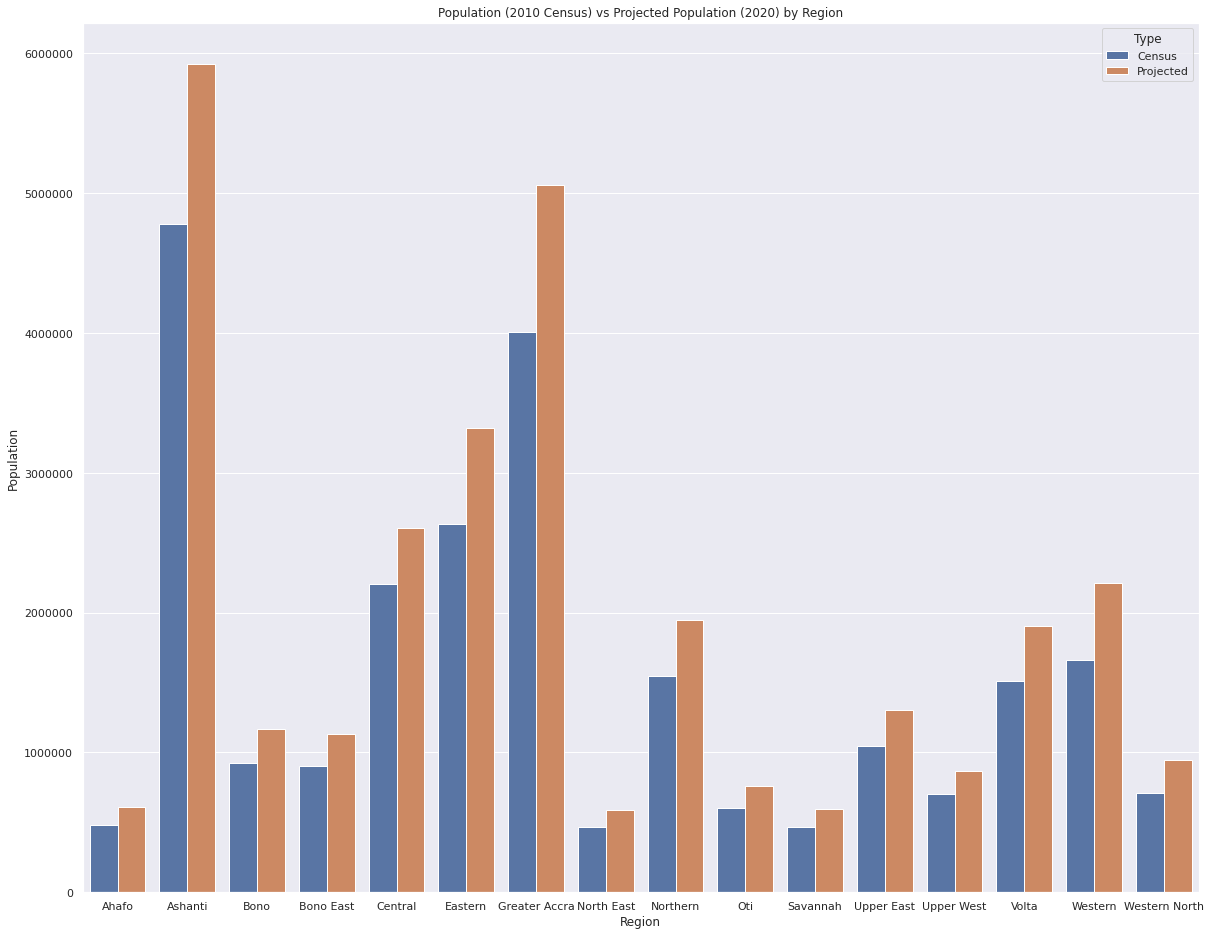

In [13]:
#transform the data using melt so both populations can do a grouped graph

newreg_pop = pd.melt(reg_pop, id_vars='Region', var_name='Type', value_name='Population')

ax=sns.barplot(x='Region', y='Population', hue='Type', data=newreg_pop)
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Population (2010 Census) vs Projected Population (2020) by Region')

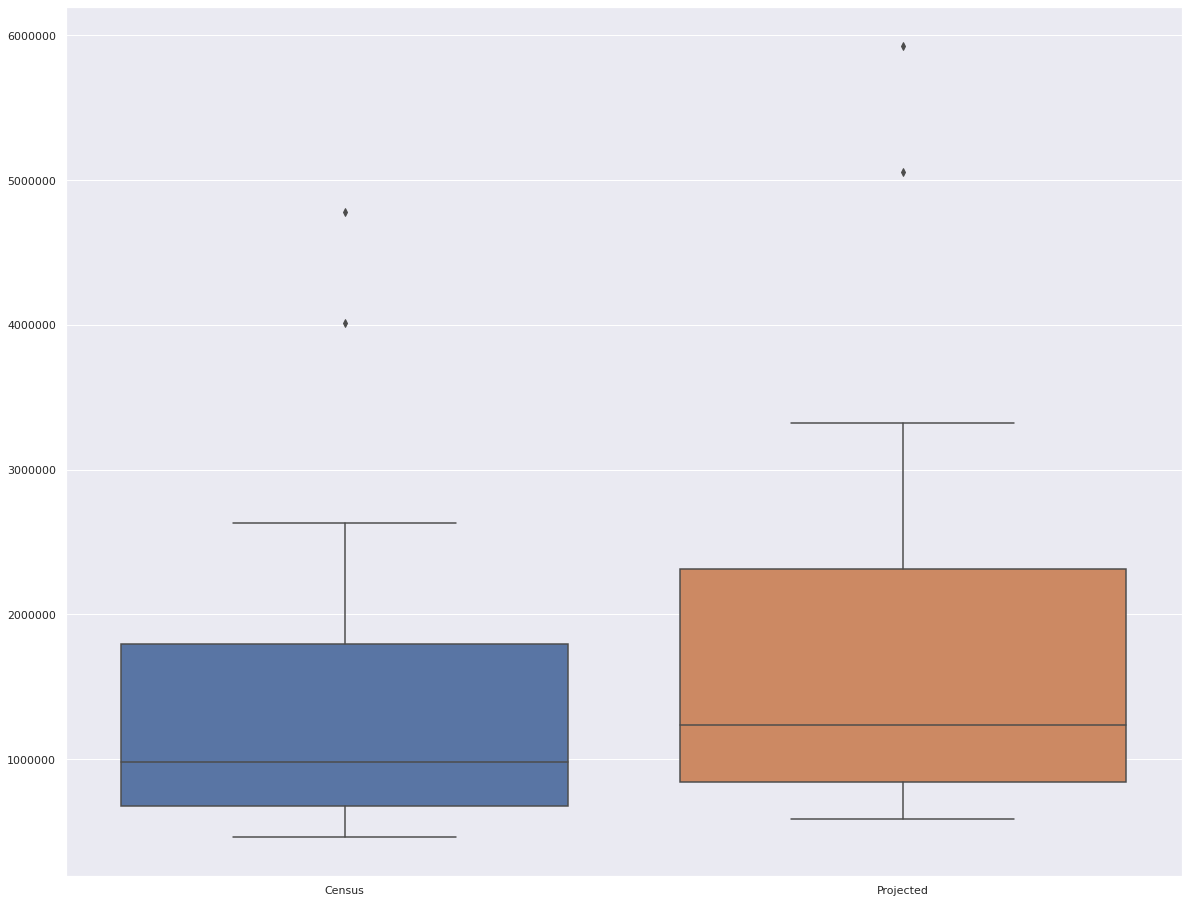

In [14]:
sns.boxplot(data=reg_pop)
plt.ticklabel_format(style='plain', axis='y')

<AxesSubplot:xlabel='Region', ylabel='Population'>

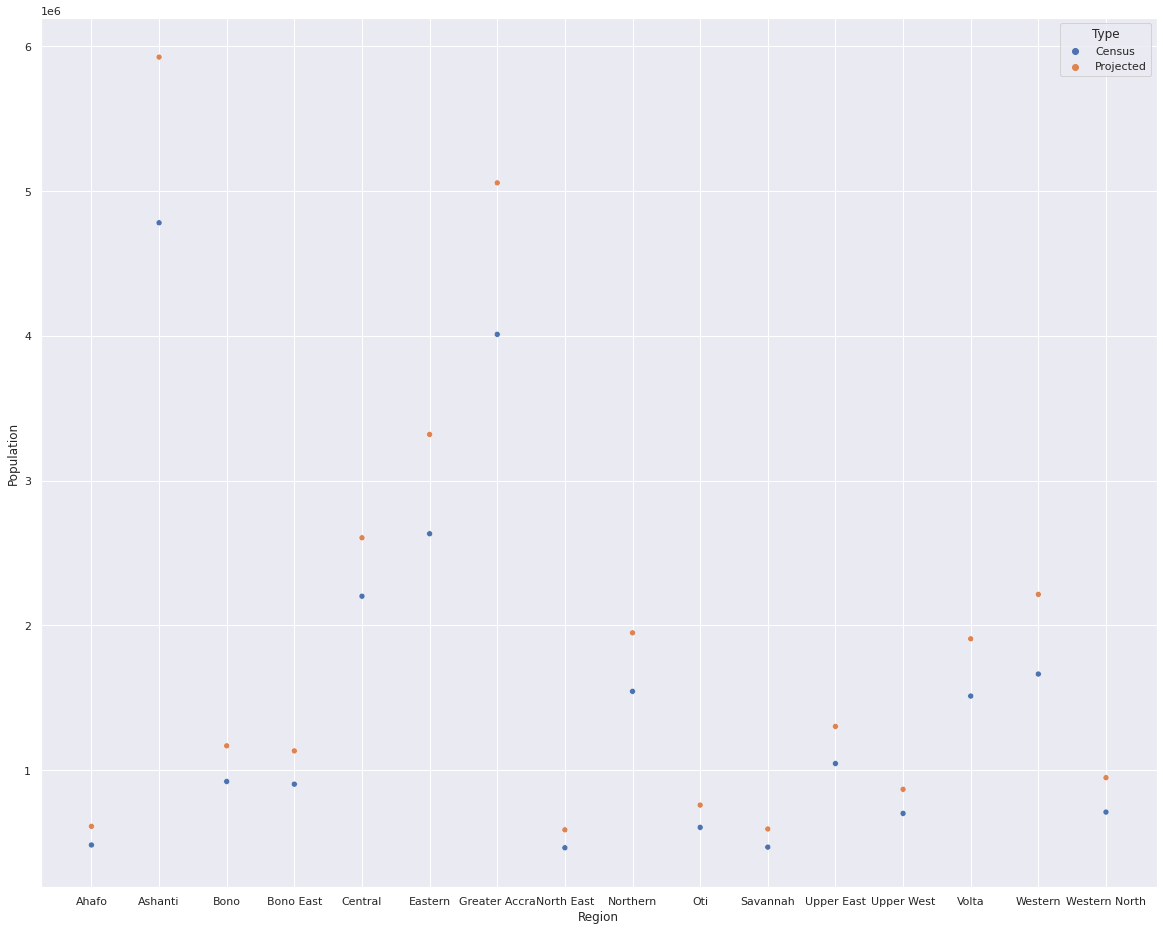

In [15]:
sns.scatterplot(x='Region', y='Population', hue='Type', data=newreg_pop)

SCRAPING THE DATA FOR DISTRICTS

In [54]:
districts=[]
dist_cen_pop=[]
dist_proj_pop=[]
status=[]

In [55]:
#scraping thr data for districts


dbi=2

while dbi<33:
    
    district=data.xpath(f'/html/body/article/table/tbody{[dbi]}/tr/td/a/span/text()')
    census=data.xpath(f'/html/body/article/table/tbody{[dbi]}/tr/td[3]/text()')
    proj_pop=data.xpath(f'/html/body/article/table/tbody{[dbi]}/tr/td[4]/text()')
    dist_type=data.xpath(f'/html/body/article/table/tbody{[dbi]}/tr/td[2]/text()')
    
    for (dist,popn1,popn2,name) in (district,census,proj_pop,dist_type):
        districts.append(dist)
        dist_cen_pop.append(popn)
        dist_proj_pop.append(popn)
        status.append(name)
    dbi+=2
    
#print(districts)

ValueError: too many values to unpack (expected 4)

In [56]:
districts=[]
dist_cen_pop=[]
dist_proj_pop=[]
status=[]

dbi=2

while dbi<33:
    
    district=data.xpath(f'/html/body/article/table/tbody{[dbi]}/tr/td/a/span/text()')
    census=data.xpath(f'/html/body/article/table/tbody{[dbi]}/tr/td[3]/text()')
    proj_pop=data.xpath(f'/html/body/article/table/tbody{[dbi]}/tr/td[4]/text()')
    dist_type=data.xpath(f'/html/body/article/table/tbody{[dbi]}/tr/td[2]/text()')
    
    for dist in district:
        districts.append(dist)
    for popn1 in census:
        dist_cen_pop.append(popn1)
    for popn2 in proj_pop:
        dist_proj_pop.append(popn2)
    for type in dist_type:
        status.append(type)
    dbi+=2

In [57]:
dist_pop=pd.DataFrame(data={'District':districts, 'Status':status, 'Census':dist_cen_pop, 'Projected':dist_proj_pop})
dist_pop.replace(',','',regex=True,inplace=True)
dist_pop[['Census', 'Projected']]=dist_pop[['Census','Projected']].astype('int64')
print(dist_pop)
#dist_pop.to_csv('Population_by_District_(GH).csv', index=False)

                    District              Status  Census  Projected
0    Asunafo North Municipal  Municipal District  124685     157870
1              Asunafo South            District   95580     120976
2              Asutifi North            District   52259      66141
3              Asutifi South            District   53584      67763
4       Tano North Municipal  Municipal District   79973     101305
..                       ...                 ...     ...        ...
255                     Bodi            District   53314      71133
256                  Juabeso            District   58435      77963
257         Sefwi Akontombra            District   82467     109868
258   Sefwi Wiawso Municipal  Municipal District  139200     185826
259                   Suaman            District   20529      27370

[260 rows x 4 columns]


[Text(0.5, 1.0, 'Population (2010 Census) vs Projected Population (2020) by District'),
 (0.0, 950000.0)]

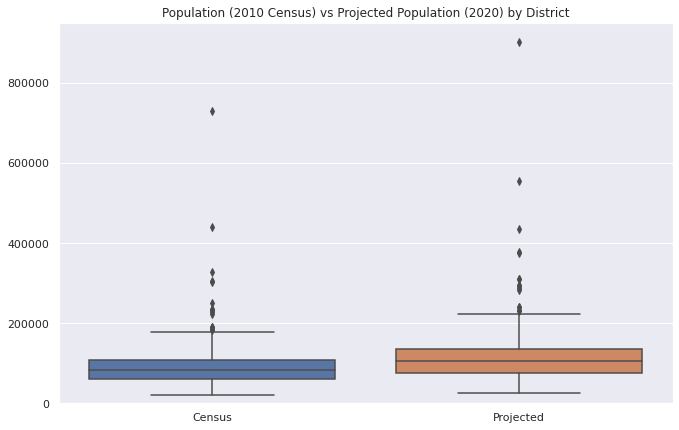

In [22]:
sns.set(rc={'figure.figsize':(11,7)})
plt.ticklabel_format(style='plain', axis='y')
ax=sns.boxplot(data=dist_pop)
ax.set(title='Population (2010 Census) vs Projected Population (2020) by District', ylim=(0,950000))